In [1]:
# https://www.wrighters.io/using-autoreload-to-speed-up-ipython-and-jupyter-work/
%load_ext autoreload
%autoreload 2
# micograd_from_scratch_mlp_1, but by applying the modularized Classes from micrograd.nn
from micrograd.tracegraph import draw_dot
from micrograd.topo import build, findLeafNodes
from micrograd.nn import Neuron, Layer, MLP

topo: [Value(data=0.017953058863242832, grad=0, op=prim, label=L0|N0|b), Value(data=0.01273861657673736, grad=0, op=prim, label=L0|N0|w0), Value(data=2.0, grad=0, op=prim, label=L0|N0|i0), Value(data=0.02547723315347472, grad=0, op=*, label=?), Value(data=0.04343029201671755, grad=0, op=+, label=?), Value(data=3.0, grad=0, op=prim, label=L0|N0|i1), Value(data=-0.4919993135889422, grad=0, op=prim, label=L0|N0|w1), Value(data=-1.4759979407668267, grad=0, op=*, label=?), Value(data=-1.4325676487501091, grad=0, op=+, label=?), Value(data=-0.8921915859278515, grad=0, op=tanh, label=L0|N0|o)]
leafNodes: [Value(data=-0.4919993135889422, grad=0, op=prim, label=L0|N0|w1), Value(data=3.0, grad=0, op=prim, label=L0|N0|i1), Value(data=2.0, grad=0, op=prim, label=L0|N0|i0), Value(data=0.01273861657673736, grad=0, op=prim, label=L0|N0|w0), Value(data=0.017953058863242832, grad=0, op=prim, label=L0|N0|b)]


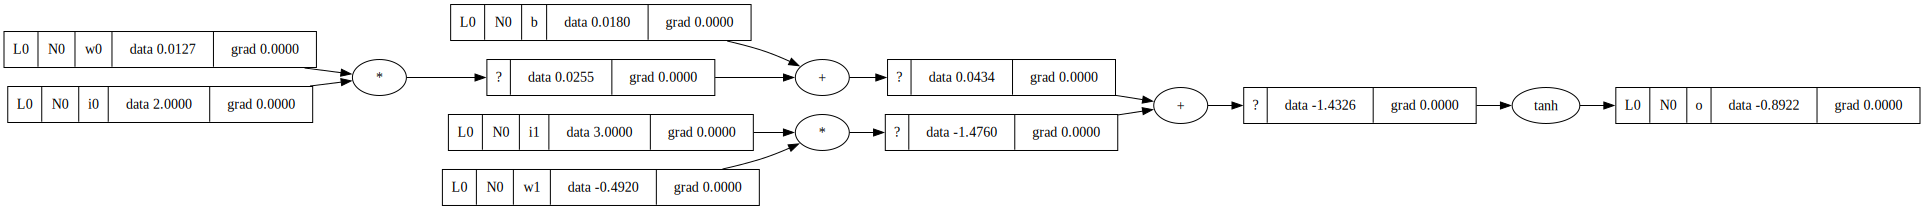

In [2]:
# _1: a Neuron with two inputs, belongs to Layer L0, is named N0
n_1 = Neuron(2, 0, 0)
x_1 = [2.0, 3.0]
# this neuron is provided with data 2.0 und 3.0. Will trigger __call__
out_1 = n_1(x_1)
# build topo and print
topo_out_1 = build(out_1)
print(f'topo: {topo_out_1}')
# find lead nodes in topo and print
leafNodes_out_1 = findLeafNodes(topo_out_1)
print(f'leafNodes: {leafNodes_out_1}')
draw_dot(out_1)

In [3]:
# _2: a Layer of 3 Neurons with 2 inputs each is named L0
l_2 = Layer(2,3,0)
x_2 = [2.0, 3.0]
out_2 = l_2(x_2)
print(out_2)

[Value(data=0.9967501559682557, grad=0, op=tanh, label=L0|N0|o), Value(data=0.1981943321171495, grad=0, op=tanh, label=L0|N1|o), Value(data=-0.9933153257173218, grad=0, op=tanh, label=L0|N2|o)]


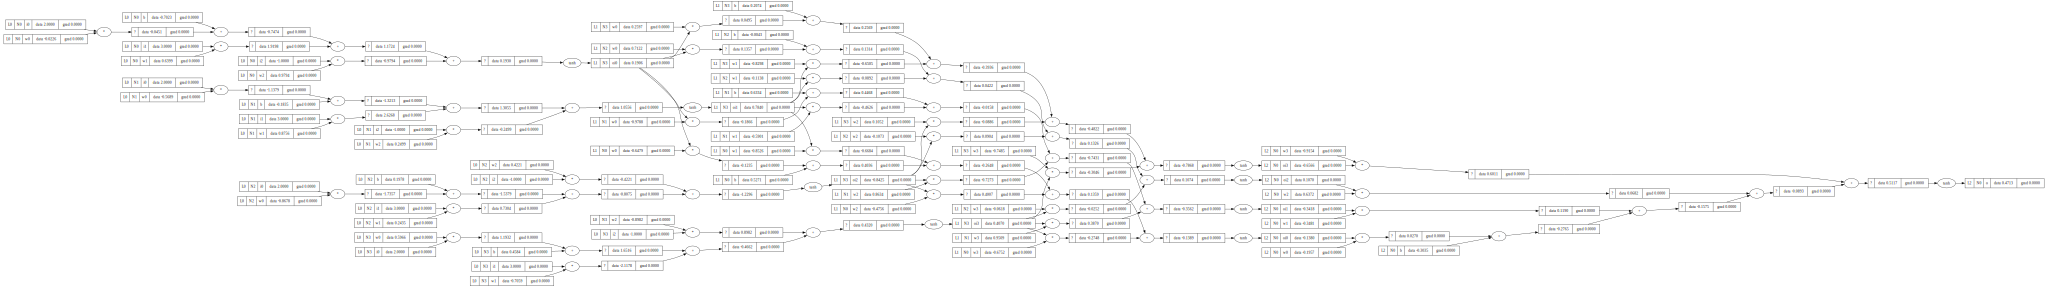

In [4]:
# _3: Now we model doc/neural_net2.jpeg(nn2). 3 input Neurons and 2 layers with 4 Neurons and 1 output Layer with 1 Neuron.
#
# Define the number of input Neurons(1st parameter), then the number inside the 2 Layers, then the number of the 
# output Neuron(to the array of the 2nd parameter)
mlp_nn3 = MLP(3, [4, 4, 1])
# Define values to the 3 input Neurons
x_nn3 = [2.0, 3.0, -1.0]
# Feed the values of the 3 input Neurons to the MLP
mlp_nn3_out = mlp_nn3(x_nn3)
draw_dot(mlp_nn3_out)